# Import Necessary Libraries

In [145]:
import pandas as pd
import emoji
import spacy
pd.options.display.max_colwidth = 100
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [48]:
sp = spacy.load('en_core_web_sm')

# Data Acquisition

In [49]:
data=pd.read_csv('/content/Usecase3_Dataset.csv')

# Know Your Data 

In [50]:
data.shape

(14640, 3)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   airline            14640 non-null  object
 2   text               14640 non-null  object
dtypes: object(3)
memory usage: 343.2+ KB


In [52]:
data.describe()

,airline_sentiment,airline,text
count,14640,14640,14640
unique,3,6,14427
top,negative,United,@united thanks
freq,9178,3822,6


In [53]:
data.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &..."
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing about it


In [54]:
data.isna().sum()

airline_sentiment    0
airline              0
text                 0
dtype: int64

# Data Preparation

In [55]:
#Removal of hastags/account
data['text'] = data['text'].str.replace('(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)', " ")

In [56]:
data.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,What said.
1,positive,Virgin America,plus you've added commercials to the experience... tacky.
2,neutral,Virgin America,I didn't today... Must mean I need to take another trip!
3,negative,Virgin America,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they hav..."
4,negative,Virgin America,and it's a really big bad thing about it


In [57]:
#Removal of Punctuation
data['text'] = data['text'].str.replace('[\.\,\!\?\:\;\-\=]', " ")

In [58]:
data.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,What said
1,positive,Virgin America,plus you've added commercials to the experience tacky
2,neutral,Virgin America,I didn't today Must mean I need to take another trip
3,negative,Virgin America,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp they hav..."
4,negative,Virgin America,and it's a really big bad thing about it


In [59]:
data.text

0                                                                                               What   said 
1                                                  plus you've added commercials to the experience    tacky 
2                                                   I didn't today    Must mean I need to take another trip 
3          it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp  they hav...
4                                                                   and it's a really big bad thing about it
                                                        ...                                                 
14635                                                     thank you we got on a different flight to Chicago 
14636      leaving over 20 minutes Late Flight  No warnings or communication until we were 15 minutes Lat...
14637                                                                    Please bring American Airlines to  
14638      you have

In [60]:
#Lower case
data['text'] =data['text'].str.lower()

In [61]:
data.text

0                                                                                               what   said 
1                                                  plus you've added commercials to the experience    tacky 
2                                                   i didn't today    must mean i need to take another trip 
3          it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp  they hav...
4                                                                   and it's a really big bad thing about it
                                                        ...                                                 
14635                                                     thank you we got on a different flight to chicago 
14636      leaving over 20 minutes late flight  no warnings or communication until we were 15 minutes lat...
14637                                                                    please bring american airlines to  
14638      you have

In [62]:
data['text']=[emoji.demojize(data['text'].loc[i]) for i in range(len(data['text']))]

In [63]:
data.text.loc[18]

'i :red_heart_selector: flying    :smiling_face_selector::thumbs_up:'

In [64]:
 data['text'] = data['text'].str.replace(":"," ")

In [65]:
data.text.loc[18]

'i  red_heart_selector  flying     smiling_face_selector  thumbs_up '

In [66]:
#data['text'] = data['text'].str.split()

In [67]:
data.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,what said
1,positive,Virgin America,plus you've added commercials to the experience tacky
2,neutral,Virgin America,i didn't today must mean i need to take another trip
3,negative,Virgin America,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp they hav..."
4,negative,Virgin America,and it's a really big bad thing about it


In [68]:
contraction= {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }



In [69]:
type(contraction)

dict

In [70]:
#data['text']=data['text'].replace(contraction,regex=True,inplace=True)

In [71]:
data.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,what said
1,positive,Virgin America,plus you've added commercials to the experience tacky
2,neutral,Virgin America,i didn't today must mean i need to take another trip
3,negative,Virgin America,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp they hav..."
4,negative,Virgin America,and it's a really big bad thing about it


In [72]:
data['text']=data['text'].replace(contraction,regex=True)

In [73]:
data.text

0                                                                                               what   said 
1                                                plus you have added commercials to the experience    tacky 
2                                                  i did not today    must mean i need to take another trip 
3          it is really aggressive to blast obnoxious "entertainment" in your guests' faces &amp  they ha...
4                                                                  and it is a really big bad thing about it
                                                        ...                                                 
14635                                                     thank you we got on a different flight to chicago 
14636      leaving over 20 minutes late flight  no warnings or communication until we were 15 minutes lat...
14637                                                                    please bring american airlines to  
14638      you have

In [74]:
df=data[['text','airline_sentiment']]

In [75]:
df.head()

,text,airline_sentiment
0,what said,neutral
1,plus you have added commercials to the experience tacky,positive
2,i did not today must mean i need to take another trip,neutral
3,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp they ha...",negative
4,and it is a really big bad thing about it,negative


In [76]:
df.shape

(14640, 2)

In [77]:
attribute = df.text
target = df.airline_sentiment

# Data Segregation

In [78]:
attribute_train, attribute_test, target_train, target_test = train_test_split(attribute, target, test_size = 0.1, random_state = 225)

print('attribute_train :', len(attribute_train))
print('attribute_test  :', len(attribute_test))
print('target_train :', len(target_train))
print('target_test  :', len(target_test))

attribute_train : 13176
attribute_test  : 1464
target_train : 13176
target_test  : 1464


# Model Building

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression()

# Logistic Regression

In [114]:
from sklearn.pipeline import Pipeline

logit_model = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])

logit_model.fit(attribute_train, target_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [115]:
example_text = ["you service was not good enough"]
example_result = logit_model.predict(example_text)

print(example_result)

['negative']


# Test

In [139]:


logit_pred = logit_model.predict(attribute_test)

print(pd.DataFrame(confusion_matrix(logit_pred, target_test)))


     0    1    2
0  846  141   60
1   30  181   31
2    6   16  153


In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(logit_pred, target_test))
print("Precision : ", precision_score(logit_pred, target_test, average = 'weighted'))
print("Recall : ", recall_score(logit_pred, target_test, average = 'weighted'))


accuracy_logit = accuracy_score(logit_pred, target_test)
precision_logit = precision_score(logit_pred, target_test, average = 'weighted')
recall_logit =recall_score(logit_pred, target_test, average = 'weighted')


Accuracy :  0.8060109289617486
Precision :  0.849447150721419
Recall :  0.8060109289617486


# DecisionTreeClassifier

In [121]:
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10) #model instance
dtree_model = Pipeline([('vectorizer',tvec)
                 ,('classifier',dtree)])

dtree_model.fit(attribute_train, target_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=28,
       

In [138]:
Dtree_pred = dtree_model.predict(attribute_test)

print(pd.DataFrame(confusion_matrix(Dtree_pred, target_test)))

     0    1    2
0  782  231  100
1   71   87   26
2   29   20  118


In [141]:
print("Accuracy : ", accuracy_score(Dtree_pred, target_test))
print("Precision : ", precision_score(Dtree_pred, target_test, average = 'weighted'))
print("Recall : ", recall_score(Dtree_pred, target_test, average = 'weighted'))


accuracy_dtree = accuracy_score(Dtree_pred, target_test)
precision_dtree = precision_score(Dtree_pred, target_test, average = 'weighted')
recall_dtree =recall_score(Dtree_pred, target_test, average = 'weighted')

Accuracy :  0.6741803278688525
Precision :  0.7615660967466211
Recall :  0.6741803278688525


# RandomForestClassifier

In [124]:
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm_model = Pipeline([('vectorizer',tvec)
                 ,('classifier',rm)])

rm_model.fit(attribute_train, target_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=25, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,


In [137]:
rm_pred = rm_model.predict(attribute_test)

print(pd.DataFrame(confusion_matrix(rm_pred, target_test)))

     0    1    2
0  878  310  196
1    4   23    2
2    0    5   46


In [142]:
print("Accuracy : ", accuracy_score(rm_pred, target_test))
print("Precision : ", precision_score(rm_pred, target_test,average='weighted'))
print("Recall : ", recall_score(rm_pred, target_test,average='weighted'))


accuracy_rm = accuracy_score(rm_pred, target_test)
precision_rm = precision_score(rm_pred, target_test, average = 'weighted')
recall_rm =recall_score(rm_pred, target_test, average = 'weighted')

Accuracy :  0.6468579234972678
Precision :  0.9489832533391367
Recall :  0.6468579234972677


# **XGB Classifier**

In [129]:
xg=XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
xg_model = Pipeline([('vectorizer',tvec)
                 ,('classifier',xg)])

xg_model.fit(attribute_train, target_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.05,
                               max_delta_step=0, max_depth=5,
                       

In [136]:
xg_pred = model3.predict(attribute_test)

print(pd.DataFrame(confusion_matrix(xg_pred, target_test)))


     0    1    2
0  840  175   78
1   35  142   25
2    7   21  141


In [143]:
print("Accuracy : ", accuracy_score(xg_pred, target_test))
print("Precision : ", precision_score(xg_pred, target_test,average='weighted'))
print("Recall : ", recall_score(xg_pred, target_test,average='weighted'))


accuracy_xg = accuracy_score(xg_pred, target_test)
precision_xg = precision_score(xg_pred, target_test, average = 'weighted')
recall_xg =recall_score(xg_pred, target_test, average = 'weighted')

Accuracy :  0.7670765027322405
Precision :  0.8357077338411191
Recall :  0.7670765027322405


# SVClassifier

In [132]:
svclassifier = SVC(kernel='linear')
svc_model = Pipeline([('vectorizer',tvec)
                 ,('classifier',svclassifier)])

svc_model.fit(attribute_train, target_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shap

In [135]:
svc_pred = model4.predict(attribute_test)

print(pd.DataFrame(confusion_matrix(svc_pred, target_test)))

     0    1    2
0  836  135   56
1   37  185   30
2    9   18  158


In [144]:
print("Accuracy : ", accuracy_score(svc_pred, target_test))
print("Precision : ", precision_score(svc_pred, target_test,average='weighted'))
print("Recall : ", recall_score(svc_pred, target_test,average='weighted'))


accuracy_svc = accuracy_score(svc_pred, target_test)
precision_svc = precision_score(svc_pred, target_test, average = 'weighted')
recall_svc =recall_score(svc_pred, target_test, average = 'weighted')

Accuracy :  0.805327868852459
Precision :  0.8409574574954981
Recall :  0.805327868852459


# Model Comparison

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


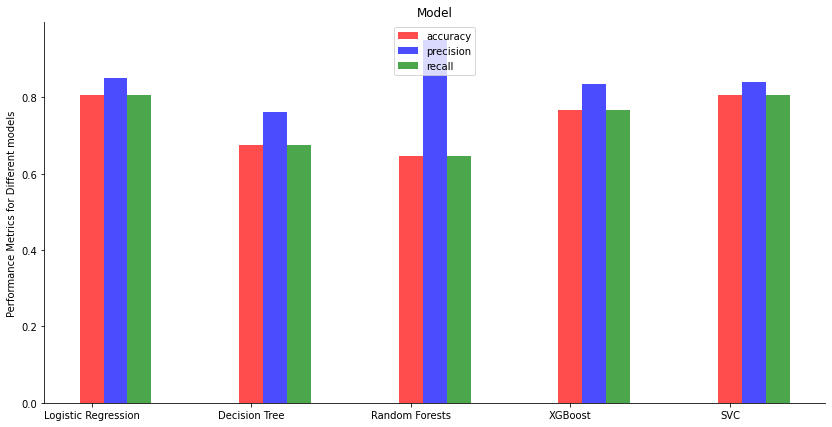

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'XGBoost','SVC']
values = [accuracy_logit, accuracy_dtree,accuracy_rm,accuracy_xg,accuracy_svc]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           

           
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'XGBoost','SVC']
values = [precision_logit, precision_dtree, precision_rm,precision_xg,precision_svc]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'XGBoost','SVC']
values = [recall_logit, recall_dtree,recall_rm, recall_xg ,recall_svc]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='upper center')

plt.show()